# Graphing with Numpy and Pandas

## Problem 1: Faceted Histogram

Run the following code block to define a function which generates two 1-dimensional `numpy` arrays. The first array, called `groups`, consists of integers between `0` and `n_groups - 1`, inclusive. The second array, called `data`, consists of real numbers. 

In [1]:
import numpy as np
from matplotlib import pyplot as plt

def create_data(n, n_groups):
    """
    generate a set of fake data with group labels. 
    n data points and group labels are generated. 
    n_groups controls the number of distinct groups. 
    Returns an np.array() of integer group labels and an 
    np.array() of float data. 
    """
    
    # random group assignments as integers between 0 and n_groups-1, inclusive
    groups = np.random.randint(0, n_groups, n)
    
    # function of the groups plus gaussian noise (bell curve)
    data   = np.sin(groups) + np.random.randn(n)
    
    return(groups, data)

## Part A

Write a function called `facet_hist()`. This function should accept five arguments: 

1. `groups`, the `np.array` of group labels as output by `create_data()`. 
2. `data`, the `np.array` of data as output by `create_data()`.
3. `m_rows`, the number of desired rows in your faceted histogram (explanation coming). 
4. `m_cols`, the number of desired columns in your faceted histogram (explanation coming). 
5. `figsize`, the size of the figure. 

Your function will create faceted histograms -- that is, a separate axis and histogram for each group. For example, if there are six groups in the data, then you should be able to use the code 

```python
groups, data = create_data(1000, 6)
facet_hist(groups, data, m_rows = 2, m_cols = 3, figsize = (6,4))
```

to create a plot like this: 

<figure class="image" style="width:70%">
  <img src="https://philchodrow.github.io/PIC16A/homework/faceted_histogram.png
" alt="An array of six histograms, depicting bell-curve data, with two rows and three columns. Each histogram is labeled with one of the six group labels." width="400px">
</figure>

It's fine if your group labels run left-to-right (so that the top row has labels 0, 1, and 2 rather than 0, 2, 4). 


You should also be able to change the orientation by modifying `m_rows`, `m_cols`, and `figsize`. 

```
facet_hist(groups, data, m_rows = 3, m_cols = 2, figsize = (4,6))
```

<figure class="image" style="width:70%">
  <img src="https://philchodrow.github.io/PIC16A/homework/faceted_histogram_2.png
" alt="An array of six histograms, depicting bell-curve data, with three rows and two columns. Each histogram is labeled with one of the six group labels." width="300px">
</figure>

### Requirements: 

1. Your function should work **whenever `m_rows*m_cols` is equal to the total number of groups.** Your function should first check that this is the case, and raise an informative `ValueError` if not. You may assume that there is at least one data point for each group label in the data supplied. 
2. For full credit, you should not loop over the individual entries of `groups` or `data`. It is acceptable to loop over the distinct values of `groups`. In general, aim to minimize `for`-loops and maximize use of `numpy` indexing. 
2. Use of `pandas` is acceptable but unnecessary, and is unlikely to make your solution significantly simpler. 
2. You should include a horizontal axis label (of your choice) along **only the bottom row** of axes. 
3. You should include a vertical axis label (e.g. "Frequency") along **only the leftmost column of axes.**
4. Each axis should have an axis title of the form "Group X", as shown above. 
5. Comments and docstrings! 

### Hints

- If your plots look "squished," then `plt.tight_layout()` is sometimes helpful. Just call it after constructing your figure, with no arguments. 
- Integer division `i // j` and remainders `i % j` are helpful here, although other solutions are also possible. 


In [2]:
# your solution here
def facet_hist(groups, data, m_rows, m_cols, figsize, **kwargs):
    '''
    A function that outputs faceted histograms, each containing data for a unique group
    
    Arguments:
    groups: np.array, group labels as outputted by create_data()
    data: np.array, data as outputted by create_data()
    m_rows: int, number of desired rows in faceted histogram
    m_cols: int, number of desired columns in faceted histogram
    figsize: size of the figure
    
    Return:
    Faceted histograms based on specifications
    '''
    
    if m_rows*m_cols == len(np.unique(groups)):
        #total number of group types
        tot_groups = len(np.unique(groups))
        #group types split evenly based on number of columns
        col_categories = np.array_split(np.unique(groups), m_cols)
        
        fig, ax = plt.subplots(m_rows, m_cols, figsize = figsize)
        
        for group_num in range(tot_groups):
            #assign row number based on the remainder
            row = int(group_num%m_rows)
            
            #assign column number based on where the group is located in previously split array
            for i in range(m_cols):
                if group_num in col_categories[i]:
                    col = i
                    
            ax[row,col].hist(data[groups == group_num], **kwargs)
            ax[row,col].set_title(f'Group {group_num}')
        
        #set horizontal axes labels on bottom row of axes
        for i in range(m_cols):
            ax[m_rows - 1, i].set_xlabel("x")
        
        #set vertical axes labels on leftmost column of axes
        for i in range(m_rows):
            ax[i,0].set_ylabel("Frequency")
    
        return plt.tight_layout()
    else:
        raise ValueError("m_rows*m_cols is not equal to the total number of groups.")

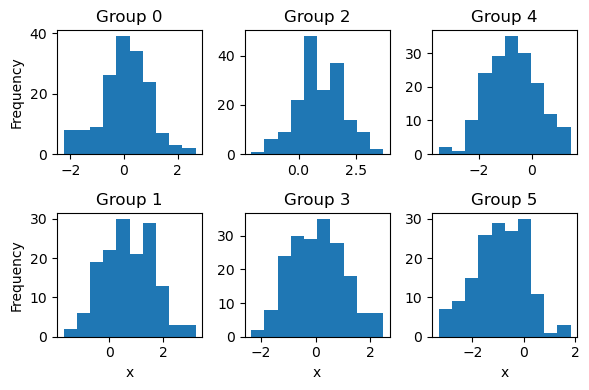

In [3]:
# test code
groups, data = create_data(1000, 6)
facet_hist(groups, data, 2, 3, figsize = (6, 4))

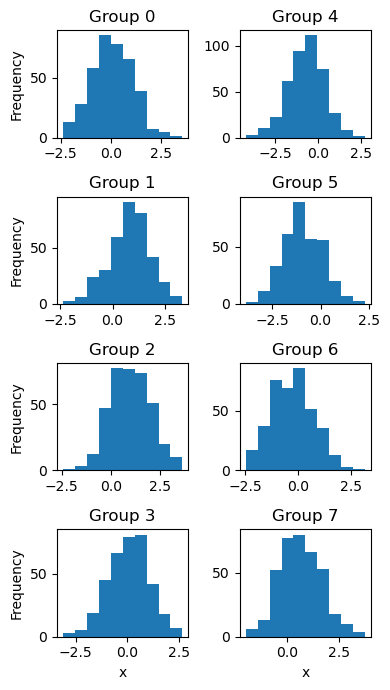

In [4]:
# test code
groups, data = create_data(3000, 8)
facet_hist(groups, data, 4, 2, figsize = (4, 7))

## Part B

Modify your function (it's ok to modify it in place, no need for copy/paste) so that it accepts additional `**kwargs` passed to `ax.hist()`. For example,  

```
facet_hist(groups, data, 2, 3, figsize = (6, 4), alpha = .4, color = "firebrick")
```

should produce 

<figure class="image" style="width:70%">
  <img src="https://philchodrow.github.io/PIC16A/homework/faceted_histogram_3.png
" alt="An array of six histograms, depicting bell-curve data, with three rows and two columns. Each histogram is labeled with one of the six group labels. The histograms are now colored pink and are slightly transparent.|" width="400px">
  <figcaption><i>Example output.</i></figcaption>
</figure>

You should be able to run this code **without defining parameters `alpha` and `color` for `facet_hist()`.** 

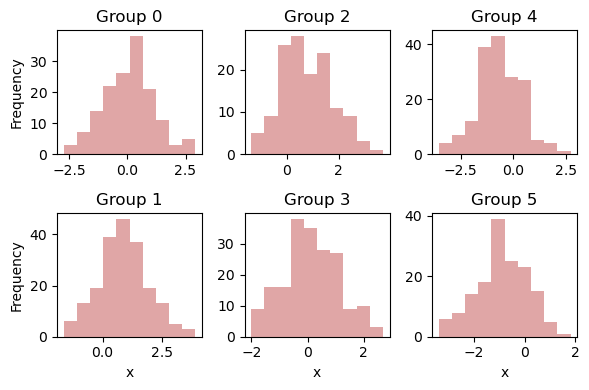

In [5]:
# run this code to show that your modified function works
groups, data = create_data(1000, 6)
facet_hist(groups, data, 2, 3, figsize = (6, 4), alpha = .4, color = "firebrick")

## Problem 2: Scatterplot Matrices

Run the following code to download, import, and display a data set from the 2019 World Happiness Report. 

In [6]:
import pandas as pd
happiness = pd.read_csv("happiness.csv")
happiness

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


This is a `pandas` data frame. Observe the following: 

1. Each row corresponds to a country or region. 
2. The `Score` column is the overall happiness score of the country, evaluated via surveys. 
3. The other columns give indicators of different features of life in the country, including GDP, level of social support, life expectancy, freedom, generosity of compatriots, and perceptions of corruption in governmental institutions. 

 You can extract each of these columns using dictionary-like syntax: 
 
 ```python
 happiness["Score"]
 ```
 
 ```
0      7.769
1      7.600
2      7.554
3      7.494
4      7.488
       ...  
151    3.334
152    3.231
153    3.203
154    3.083
155    2.853
Name: Score, Length: 156, dtype: float64
 ```
 
Technically, this output is a `pandas` `Series`; however, in this context (and most others) it's fine to simply think of it as a 1-dimensional `np.array()`. 

### Part A

As a warmup, create a scatterplot of the overall `Score` column against a numerical column of your choice. Give the horizontal and vertical axes appropriate labels. Discuss your result. Is there a correlation? Does that correlation make sense to you? 

Text(0, 0.5, 'GDP per capita')

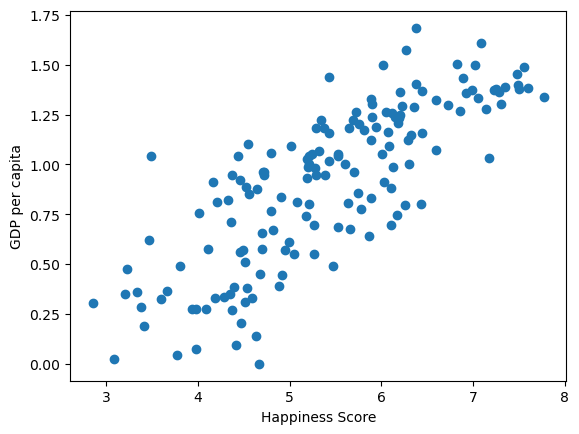

In [7]:
# plotting code here
x = happiness["Score"]
y = happiness["GDP per capita"]
plt.scatter(x,y)
plt.xlabel('Happiness Score')
plt.ylabel('GDP per capita')

**Answer:**

There is a correlation between the happiness score and GDP per capita. I believe this makes sense because happiness and the state of the economy are usually related in a cyclic way, with people becoming happier if the economy is doing well and the economy progressing as people become happier.

## Part B

That plot you made may have helped you understand whether or not there's a relationship between the overall happiness score and the variable that you chose to plot. However, there are several variables in this data set, and we don't want to manually re-run the plot for each pair of variables. Let's see if we can get a more systematic view of the correlations in the data. 

Write a function called `scatterplot_matrix()`, with arguments `data`, `cols` and `figsize`. The `cols` argument should be a list of strings, each of which are the name of one of the columns above, for example `cols = ["Score", "GDP per capita", "Social support"]`. Your function should create a *scatterplot matrix*, like this:  

```python
cols = ["Score", 
        "GDP per capita", 
        "Social support"]
           
scatterplot_matrix(data,cols,figsize = (7,7))
```

<figure class="image" style="width:70%">
  <img src="https://philchodrow.github.io/PIC16A/homework/scatterplot_matrix.png" alt="A 3x3 grid of scatterplots, showing relationships between Score and GDP, Score and Social support, and GDP and Social support. The diagonal is blank. All three variables are strongly correlated with each other." width="400px">
</figure>

There is a separate scatterplot for each possible pair of variables. In fact, there are two: one where the first variable is on the horizontal axis, and one where it's on the vertical axis. Some analysts prefer to remove half the plots to avoid redundancy, but you don't have to bother with that. The diagonal is empty, since there's no point in investigating the relationship between a variable and itself. 

Don't forget comments and docstrings! 

In [8]:
# define your function
def scatterplot_matrix(data, cols, figsize):
    '''
    A function that outputs a scatterplot matrix, each plot displaying the relationship between two columns of data
    
    Arguments:
    data: a data set
    cols: list of strings, names of the columns of the data set
    figsize: size of the figure
    
    Return:
    A scatterplot matrix
    '''
        
    fig, ax = plt.subplots(len(cols), len(cols), figsize = figsize)
        
    for row in range(len(cols)):
        for col in range(len(cols)):
            #create a scatterplot for every figure except the diagonals
            if row != col:
                ax[row,col].scatter(data[cols[row]], data[cols[col]], s = 12)
        
    #name rows
    for row in range(len(cols)):
        for col in range(len(cols)):
            ax[row,col].set_xlabel(cols[row])
        
    #name columns
    for row in range(len(cols)):
        for col in range(len(cols)):
            ax[row,col].set_ylabel(cols[col])
    
    return plt.tight_layout()

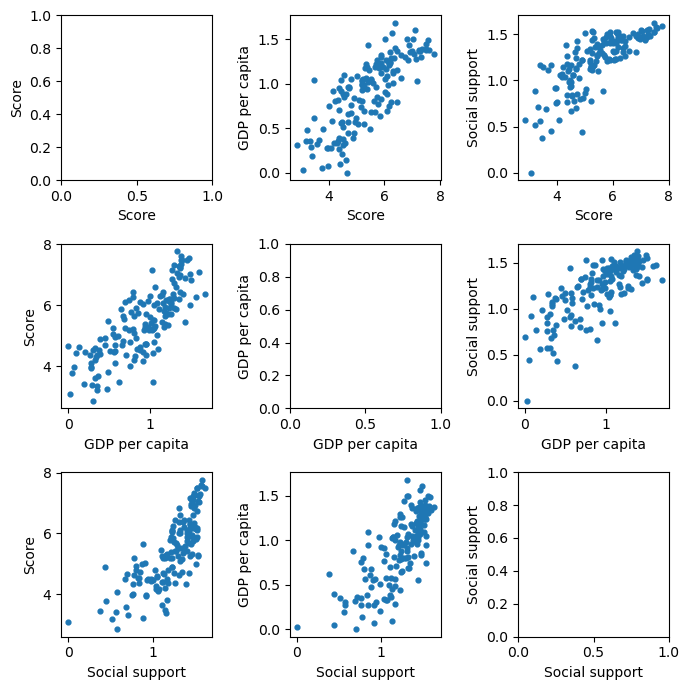

In [9]:
# test your code, several times if needed, and discuss the correlations you observe. 
# Add code cells if needed to show multiple outputs.
cols = ["Score", "GDP per capita", "Social support"]    
scatterplot_matrix(happiness, cols, figsize = (7,7))